<h1>Cirrhosis Dataset Analysis</h1>

**The Dataset was chosen from Kaggle which is publicly available**

https://www.kaggle.com/datasets/fedesoriano/cirrhosis-prediction-dataset

**Imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load the Dataset**

In [2]:
df = pd.read_csv("/Users/karthik/Desktop/cirrhosis.csv")

In [3]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


**Size of the dataset**

In [4]:
df.shape

(418, 20)

**Columns available in the dataset**

In [5]:
df.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

**Dataset Info**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

**Descriptive Analysis of the Dataset**

In [7]:
df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


 - Number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986

In [9]:
df['N_Days'].value_counts()

N_Days
1434    2
3445    2
1216    2
1329    2
1067    2
       ..
2990    1
3098    1
3150    1
3149    1
976     1
Name: count, Length: 399, dtype: int64

- status of the patient C (censored), CL (censored due to liver tx), or D (death)

In [10]:
df['Status'].value_counts()

Status
C     232
D     161
CL     25
Name: count, dtype: int64

- type of drug D-penicillamine or placebo

In [11]:
df['Drug'].value_counts()

Drug
D-penicillamine    158
Placebo            154
Name: count, dtype: int64

- age of the patients in days

In [12]:
min_age = df['Age'].min()
max_age = df['Age'].max()

In [13]:
age_range = max_age - min_age

In [14]:
age_range

19052

In [15]:
df['Age_in_years'] = df['Age'] / 365

In [16]:
bins = [0, 5, 12, 19, 35, 50, 100] 
labels = ['0-5', '6-12', '13-19', '20-35', '36-50', '51+']  

df['Age_Group'] = pd.cut(df['Age_in_years'], bins=bins, labels=labels, right=False) 

In [17]:
df['Age_Group'].value_counts()

Age_Group
51+      223
36-50    166
20-35     29
0-5        0
6-12       0
13-19      0
Name: count, dtype: int64

- M (male) or F (female)

In [18]:
df['Sex'].value_counts()

Sex
F    374
M     44
Name: count, dtype: int64

- presence of ascites N (No) or Y (Yes

In [19]:
df['Ascites'].value_counts()

Ascites
N    288
Y     24
Name: count, dtype: int64

 - presence of hepatomegaly N (No) or Y (Yes)

In [21]:
df['Hepatomegaly'].value_counts()

Hepatomegaly
Y    160
N    152
Name: count, dtype: int64

- presence of spiders N (No) or Y (Yes)

In [22]:
df['Spiders'].value_counts()

Spiders
N    222
Y     90
Name: count, dtype: int64

- presence of edema N (no edema and no diuretic therapy for edema)
- S (edema present without diuretics, or edema resolved by diuretics)
- Y (edema despite diuretic therapy)

In [23]:
df['Edema'].value_counts()

Edema
N    354
S     44
Y     20
Name: count, dtype: int64

- serum bilirubin in [mg/dl]

In [24]:
df['Bilirubin'].value_counts()

Bilirubin
0.7     33
0.6     31
0.5     23
0.8     23
1.1     20
        ..
24.5     1
10.8     1
3.7      1
5.9      1
4.6      1
Name: count, Length: 98, dtype: int64

In [25]:
bins = [0, 1, 2, 5, 25]  
labels = ['Low', 'Normal', 'High', 'Very High']


df['Bilirubin_Category'] = pd.cut(df['Bilirubin'], bins=bins, labels=labels, right=False)

In [26]:
df['Bilirubin_Category'].value_counts()

Bilirubin_Category
Low          142
Normal       107
High          91
Very High     76
Name: count, dtype: int64

- serum cholesterol in [mg/dl]

In [27]:
df['Cholesterol'].value_counts()

Cholesterol
260.0    4
316.0    4
448.0    4
257.0    3
259.0    3
        ..
486.0    1
528.0    1
458.0    1
950.0    1
576.0    1
Name: count, Length: 201, dtype: int64

In [28]:
bins = [0, 200, 239, 1000] 
labels = ['Desirable', 'Borderline High', 'High']

df['Cholesterol_Category'] = pd.cut(df['Cholesterol'], bins=bins, labels=labels, right=False)

In [29]:
df['Cholesterol_Category'].value_counts()

Cholesterol_Category
High               218
Borderline High     36
Desirable           20
Name: count, dtype: int64

-  albumin in [gm/dl]

In [30]:
df['Albumin'].value_counts()

Albumin
3.35    11
3.50     8
3.60     8
3.40     7
3.65     7
        ..
3.38     1
2.43     1
3.05     1
1.96     1
3.17     1
Name: count, Length: 154, dtype: int64

In [31]:
bins = [0, 3.5, 5.0, 10] 
labels = ['Low', 'Normal', 'High']

df['Albumin_Category'] = pd.cut(df['Albumin'], bins=bins, labels=labels, right=False)

In [32]:
df['Albumin_Category'].value_counts()

Albumin_Category
Normal    227
Low       191
High        0
Name: count, dtype: int64

- urine copper in [ug/day]

In [33]:
df['Copper'].value_counts()

Copper
52.0     8
67.0     7
58.0     6
75.0     6
20.0     5
        ..
178.0    1
110.0    1
154.0    1
269.0    1
186.0    1
Name: count, Length: 158, dtype: int64

In [34]:
bins = [0, 50, 100, 300]  
labels = ['Low', 'Normal', 'High'] 

df['Copper_Category'] = pd.cut(df['Copper'], bins=bins, labels=labels, right=False)

In [35]:
df['Copper_Category'].value_counts()

Copper_Category
Normal    108
High       98
Low        96
Name: count, dtype: int64

- alkaline phosphatase in [U/liter]

In [36]:
df['Alk_Phos'].value_counts()

Alk_Phos
601.0     2
794.0     2
1282.0    2
1790.0    2
7277.0    2
         ..
804.0     1
2404.0    1
754.0     1
979.0     1
2115.0    1
Name: count, Length: 295, dtype: int64

In [39]:
bins = [0, 100, 300, 1000, df['Alk_Phos'].max()]  
labels = ['Low', 'Normal', 'High', 'Very High']

df['Alk_Phos_Category'] = pd.cut(df['Alk_Phos'], bins=bins, labels=labels, right=False)

In [40]:
df['Alk_Phos_Category'].value_counts()

Alk_Phos_Category
Very High    212
High          98
Normal         1
Low            0
Name: count, dtype: int64

- SGOT in [U/ml]

In [41]:
df['SGOT'].value_counts()

SGOT
71.30     6
137.95    5
120.90    5
97.65     5
170.50    5
         ..
104.49    1
67.08     1
136.74    1
173.60    1
136.00    1
Name: count, Length: 179, dtype: int64

In [42]:
bins = [0, 40, 100, 200, df['SGOT'].max()] 
labels = ['Normal', 'Mildly Elevated', 'Moderately Elevated', 'Severely Elevated'] 

df['SGOT_Category'] = pd.cut(df['SGOT'], bins=bins, labels=labels, right=False)

In [44]:
df['SGOT_Category'].value_counts()

SGOT_Category
Moderately Elevated    157
Mildly Elevated        126
Severely Elevated       26
Normal                   2
Name: count, dtype: int64

-  triglicerides in [mg/dl]

In [45]:
df['Tryglicerides'].value_counts()

Tryglicerides
118.0    7
90.0     6
91.0     6
68.0     5
56.0     5
        ..
272.0    1
318.0    1
243.0    1
598.0    1
82.0     1
Name: count, Length: 146, dtype: int64

In [46]:
bins = [0, 150, 199, 499, df['Tryglicerides'].max()]  
labels = ['Normal', 'Borderline High', 'High', 'Very High']

df['Triglycerides_Category'] = pd.cut(df['Tryglicerides'], bins=bins, labels=labels, right=False)

In [47]:
df['Triglycerides_Category'].value_counts()

Triglycerides_Category
Normal             210
Borderline High     44
High                27
Very High            0
Name: count, dtype: int64

- histologic stage of disease (1, 2, 3, or 4)

In [48]:
df['Stage'].value_counts()

Stage
3.0    155
4.0    144
2.0     92
1.0     21
Name: count, dtype: int64

<H2>NOTE: <BR> <BR>This analysis is conducted for demonstration purposes and does not represent an in-depth exploration.</H2>
    
<H2>  To create accurate and meaningful categories for thorough analysis, it's essential to perform a literature review and consult domain experts. </h2>
    
<h2>  This will ensure that the classifications used are based on sound scientific and medical principles. </h2>


<h1> Exploratory Data Analysis </h1>

- Heatmap

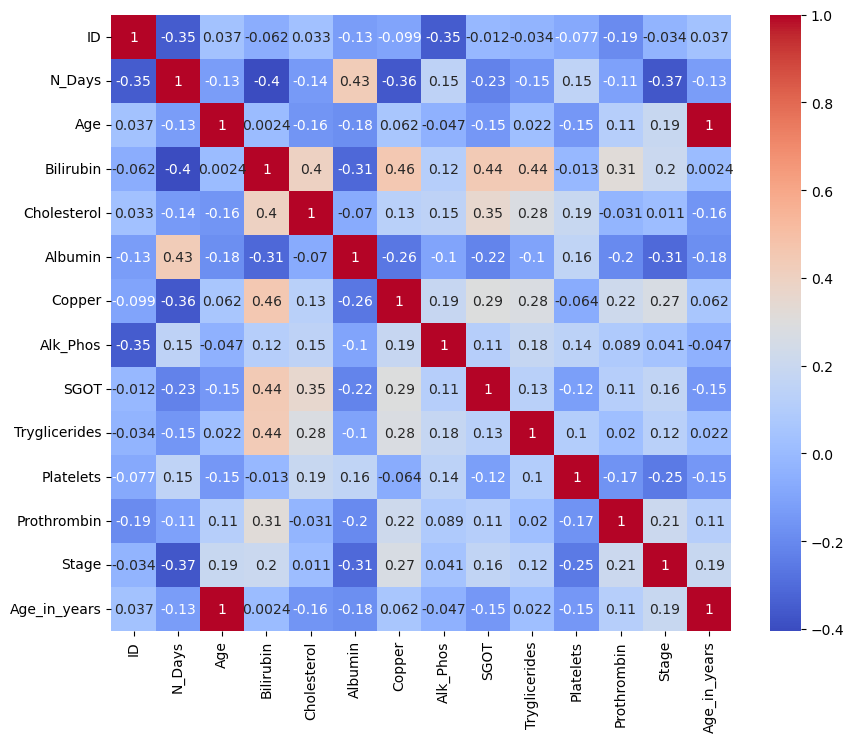

In [50]:
numeric_df = df.select_dtypes(include=[float, int])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

**Visualising the Missing Value**

<Axes: >

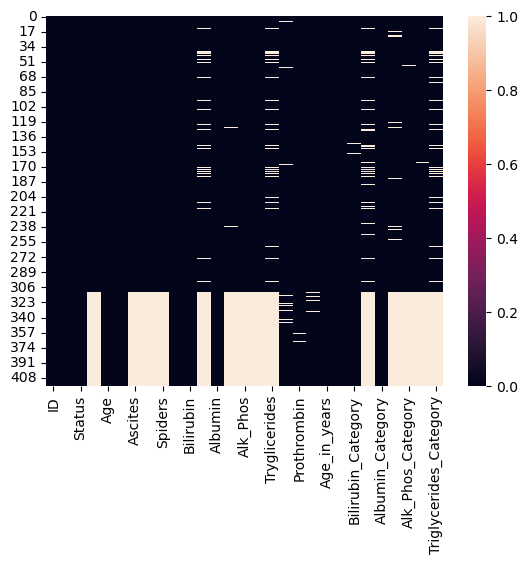

In [51]:
sns.heatmap(df.isna())

**Distribution of numeric features**

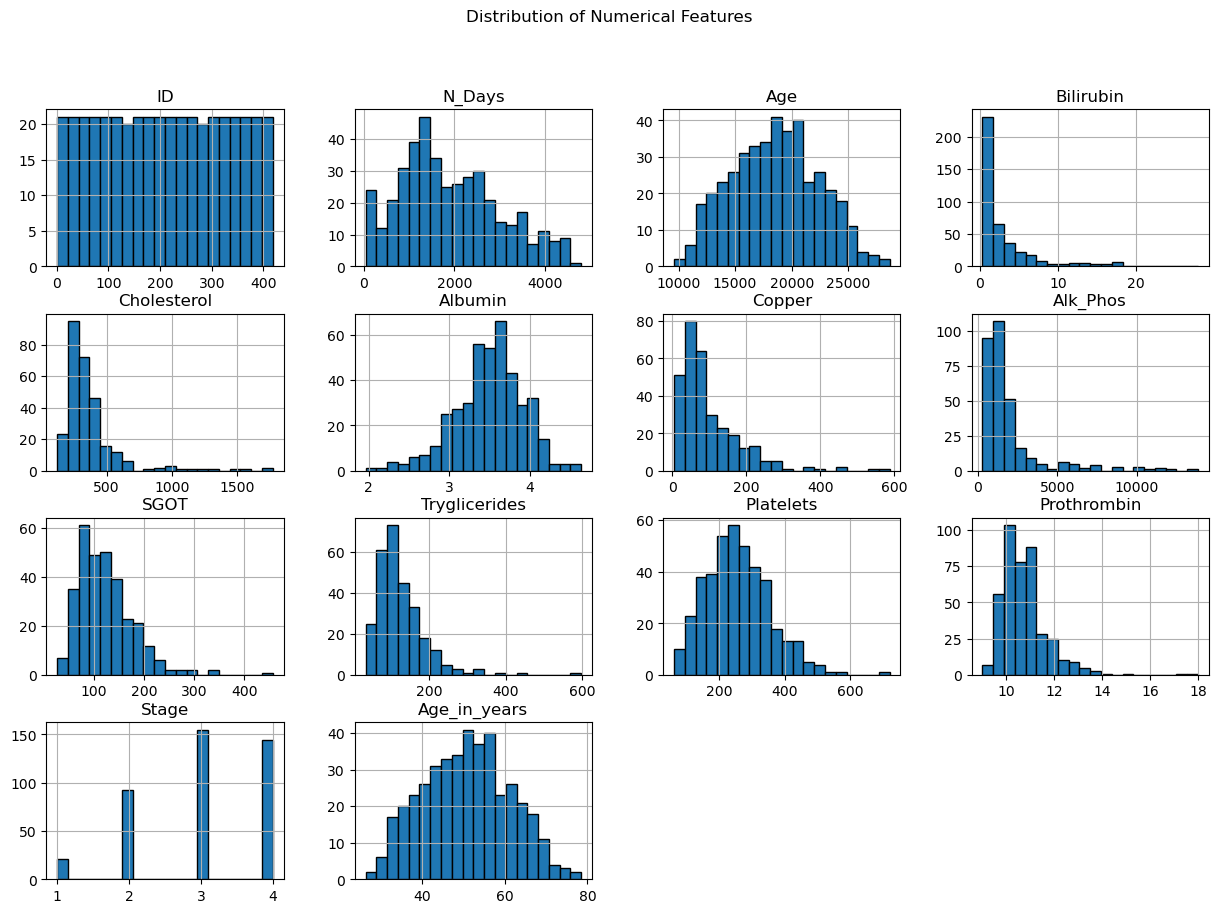

In [52]:
numeric_df = df.select_dtypes(include=[float, int])
numeric_df.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.show()

**Boxplot Analysis of numeric featuers**

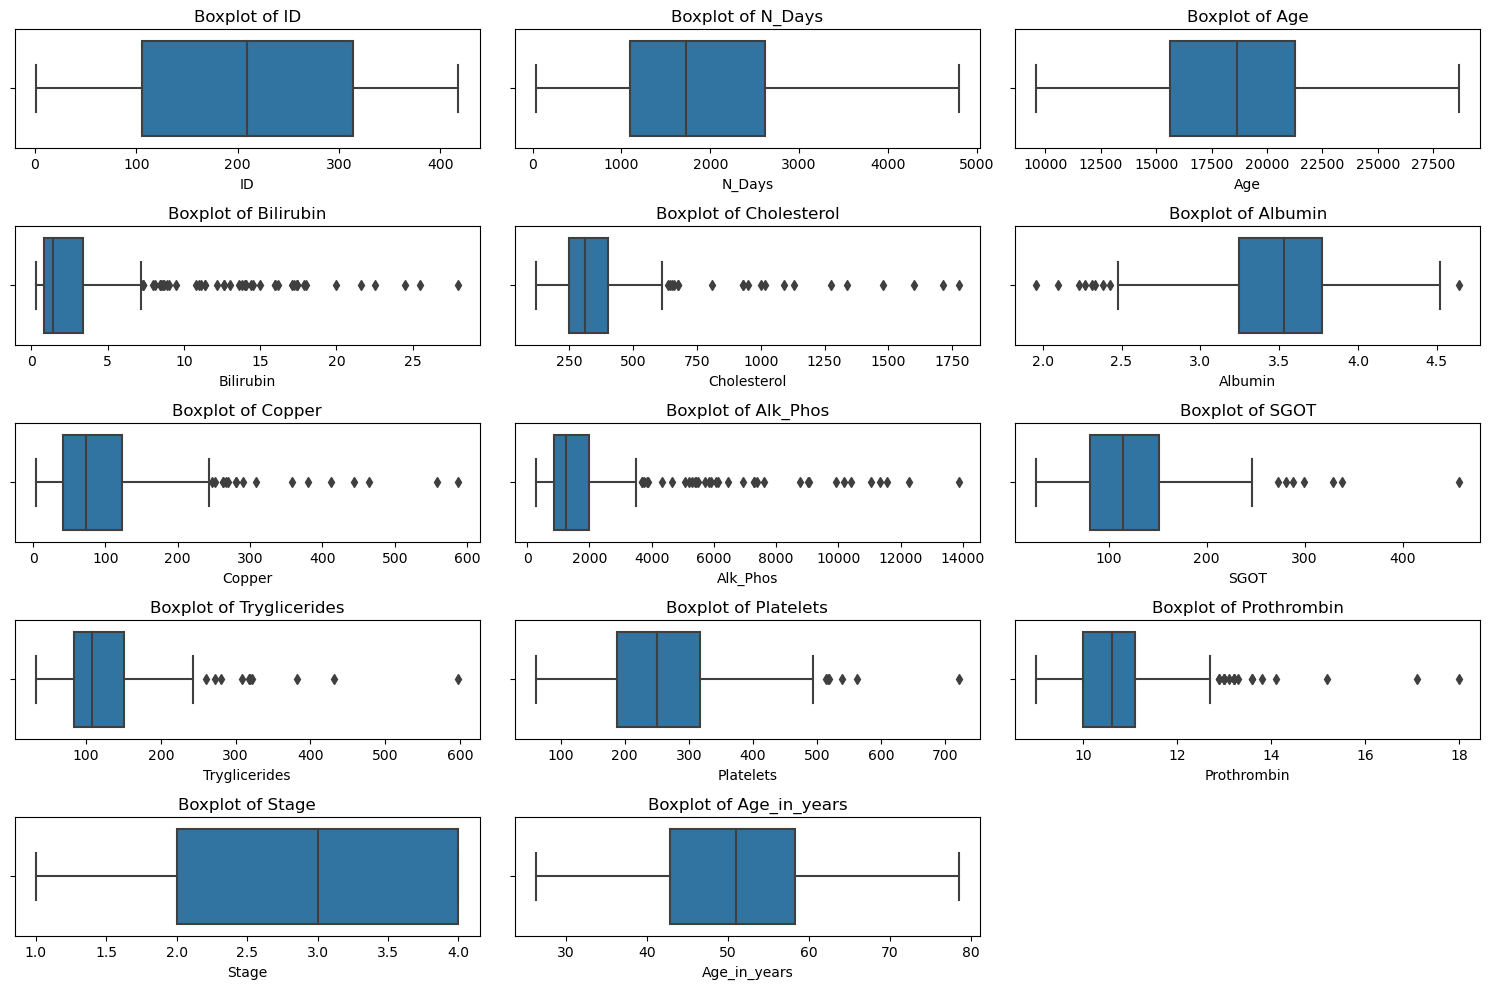

In [53]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_df.columns, 1):
    plt.subplot((len(numeric_df.columns) + 2) // 3, 3, i)
    sns.boxplot(data=numeric_df, x=column)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

**By performing analysis, we can decide the preprocessing steps which are necessary for the pipeline**

**- Lets Jump into the Object Oriented Pipeline...**